In [1]:
# Code to do data exploration for travel prediction model

from skafossdk import *
import logging
import random
import pickle
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from common.data import *
from common.modeling import *

/opt/conda/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
ska=Skafos()

2018-12-11 05:13:18,686 - skafossdk.data_engine - INFO - Connecting to DataEngine
2018-12-11 05:13:18,730 - skafossdk.data_engine - INFO - DataEngine Connection Opened


In [24]:
# Pull in all columns for data exploration
csvCols = ['traveler_id', 'gender', 'college_degree', 'partner', 'dependents',
           'months_since_last_trip', 'phone_service', 'internet_service',
           'has_netflix', 'streaming_tv', 'apt_lease_length', 'tsa_pre',
           'payment_method', 'avg_cc_bill', 'travel']
df = get_data(csvCols, "training")

In [25]:
# Check format of data frame
df.head()

,traveler_id,gender,college_degree,partner,dependents,months_since_last_trip,phone_service,internet_service,has_netflix,streaming_tv,apt_lease_length,tsa_pre,payment_method,avg_cc_bill,travel
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,Yes,No,Month-to-month,Yes,Amex,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,No,No,One year,No,Visa,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,Month-to-month,Yes,Visa,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,No,No,One year,No,Discover,1840.75,No
4,9305-CDSKC,Female,0,No,No,8,Yes,Fiber optic,No,Yes,Month-to-month,Yes,Amex,820.50,Yes


In [49]:
# Remove traveler_id to plot correlations
df_plot = df.drop(['traveler_id'], axis=1)
df_plot['travel'] = df[TARGET_VARIABLE].apply(lambda x: 1 if x == "Yes" else 0)
df_plot.head()

,gender,college_degree,partner,dependents,months_since_last_trip,phone_service,internet_service,has_netflix,streaming_tv,apt_lease_length,tsa_pre,payment_method,avg_cc_bill,travel
0,Female,0,Yes,No,1,No,DSL,Yes,No,Month-to-month,Yes,Amex,29.85,0
1,Male,0,No,No,34,Yes,DSL,No,No,One year,No,Visa,1889.50,0
2,Male,0,No,No,2,Yes,DSL,Yes,No,Month-to-month,Yes,Visa,108.15,1
3,Male,0,No,No,45,No,DSL,No,No,One year,No,Discover,1840.75,0
4,Female,0,No,No,8,Yes,Fiber optic,No,Yes,Month-to-month,Yes,Amex,820.50,1


In [44]:
# Create also dummy variables for pairplots?

,gender,college_degree,partner,dependents,months_since_last_trip,phone_service,internet_service,has_netflix,streaming_tv,apt_lease_length,tsa_pre,payment_method,avg_cc_bill,travel
0,Female,0,Yes,No,1,No,DSL,Yes,No,Month-to-month,Yes,Amex,29.85,0
1,Male,0,No,No,34,Yes,DSL,No,No,One year,No,Visa,1889.50,0
2,Male,0,No,No,2,Yes,DSL,Yes,No,Month-to-month,Yes,Visa,108.15,1
3,Male,0,No,No,45,No,DSL,No,No,One year,No,Discover,1840.75,0
4,Female,0,No,No,8,Yes,Fiber optic,No,Yes,Month-to-month,Yes,Amex,820.50,1


In [13]:
# Use seaborn to do some basic data visualization
import seaborn as sns

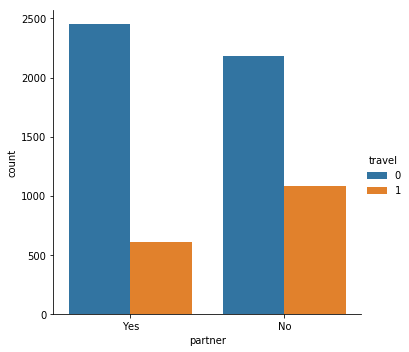

In [56]:
# Example: Does having a partner impact international travel
sns.catplot(x="partner", data=df_plot, kind="count", hue="travel")

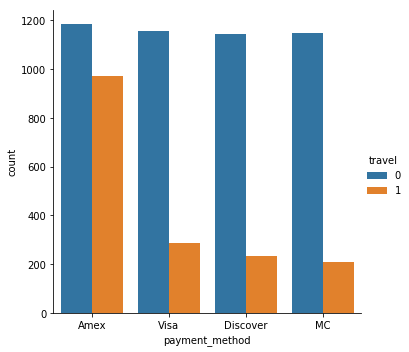

In [58]:
# What about payment method for tickets? 
sns.catplot(x="payment_method", data=df_plot, kind="count", hue="travel")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


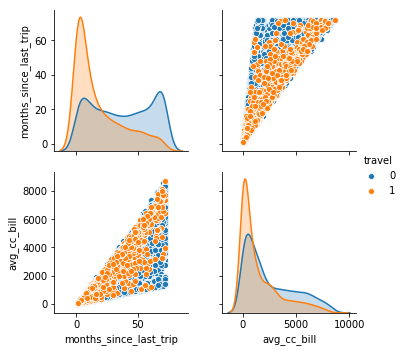

In [67]:
# Months since last trip? avg_cc_bill? 
sns.pairplot(df_plot, vars=["months_since_last_trip", "avg_cc_bill"], hue="travel")